###relu###

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 96ms/step - accuracy: 0.8902 - loss: 0.3484 - val_accuracy: 0.9733 - val_loss: 0.0894
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9760 - loss: 0.0771 - val_accuracy: 0.9737 - val_loss: 0.0856
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9831 - loss: 0.0543 - val_accuracy: 0.9727 - val_loss: 0.0932
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.9771 - val_loss: 0.0788
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9772 - val_loss: 0.0848
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9808 - val_loss: 0.0709
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9785 - val_loss: 0.0805
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.9943 - loss: 0.0176 -

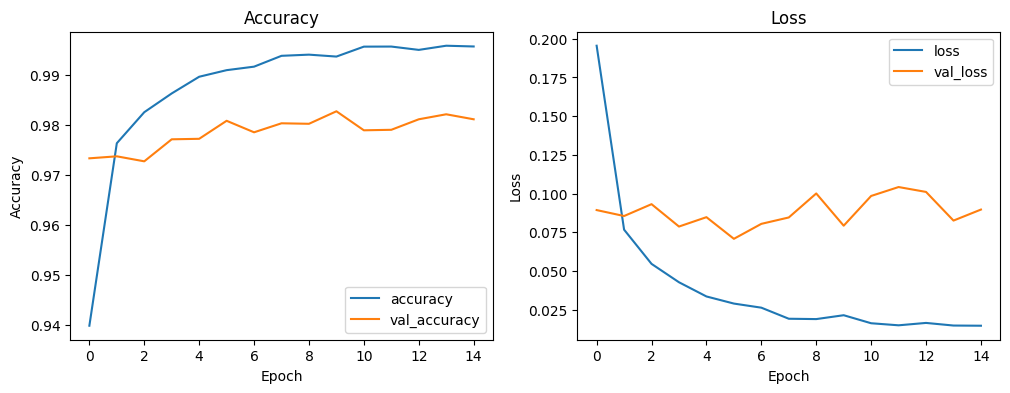

In [1]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###Sigmoid###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.6254 - loss: 1.1329 - val_accuracy: 0.9332 - val_loss: 0.2165
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9350 - loss: 0.2076 - val_accuracy: 0.9546 - val_loss: 0.1472
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9555 - loss: 0.1417 - val_accuracy: 0.9648 - val_loss: 0.1100
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9702 - loss: 0.0964 - val_accuracy: 0.9695 - val_loss: 0.1006
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.9762 - loss: 0.0745 - val_accuracy: 0.9744 - val_loss: 0.0826
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 102ms/step - accuracy: 0.9808 - loss: 0.0603 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9769 - val_loss: 0.0763
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9871 - loss: 0.04

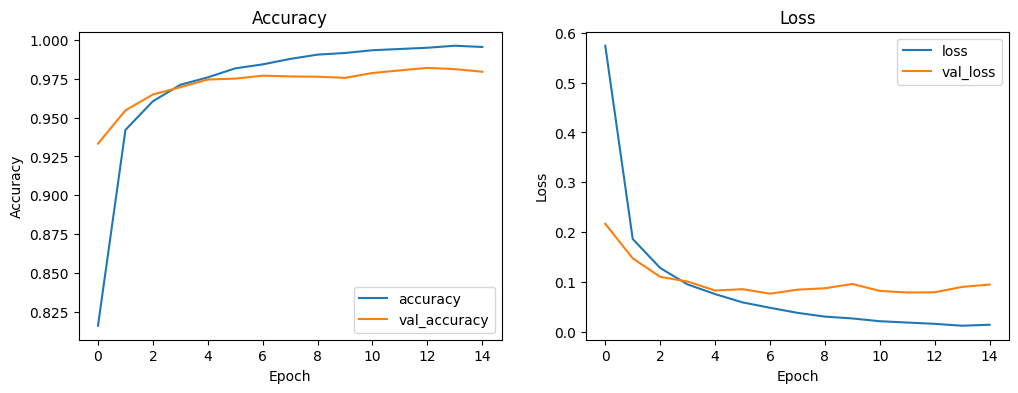

In [2]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='sigmoid', input_shape=(1024)),
    layers.Dense(1024, activation='sigmoid', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###Softplus###

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 101ms/step - accuracy: 0.6562 - loss: 1.2687 - val_accuracy: 0.9361 - val_loss: 0.2036
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9418 - loss: 0.1848 - val_accuracy: 0.9588 - val_loss: 0.1301
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.9641 - loss: 0.1142 - val_accuracy: 0.9694 - val_loss: 0.0972
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9722 - loss: 0.0881 - val_accuracy: 0.9640 - val_loss: 0.1111
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9793 - loss: 0.0677 - val_accuracy: 0.9738 - val_loss: 0.0858
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9774 - val_loss: 0.0740
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9869 - loss: 0.0412 - val_accuracy: 0.9761 - val_loss: 0.0821
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.9889 - loss: 0

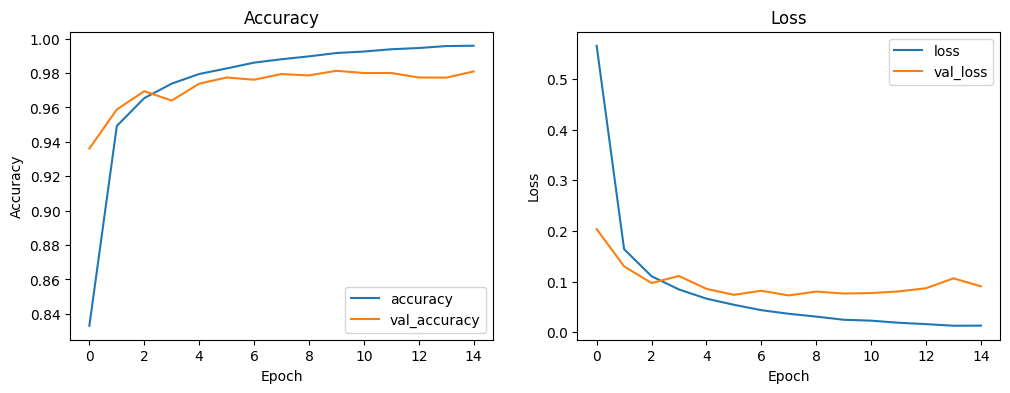

In [4]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='softplus', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='softplus', input_shape=(1024)),
    layers.Dense(1024, activation='softplus', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()